In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [3]:
data2 = pd.read_csv('./data.csv')
data2

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2


In [4]:
data2[data2.columns] = data2[data2.columns].astype('Int64')

data2 = data2.drop('Final_EDSS', axis=1)
data2 = data2.drop('Unnamed: 0', axis=1)
data2 = data2.drop('Initial_EDSS', axis=1)

data2['group'] = data2['group'].replace(2, 0)
data2

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20,1,1,2,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25,3,2,10,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20,3,1,3,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15,1,1,7,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20,2,1,6,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8,3,1,9,2,0,0,0,0,0,0,0,0,0,0
269,1,21,15,3,3,5,2,1,0,0,0,0,0,0,0,1,0
270,2,19,12,3,3,13,2,0,1,1,1,0,0,0,0,1,0
271,2,32,15,3,3,15,2,1,1,1,1,0,1,1,1,0,0


In [5]:
data2["group"  ].value_counts()

group
0    148
1    125
Name: count, dtype: Int64

In [6]:
# Verificando si hay valores nulos por columna
print(data2.isnull().sum())

Gender                     0
Age                        0
Schooling                  1
Breastfeeding              0
Varicella                  0
Initial_Symptom            1
Mono_or_Polysymptomatic    0
Oligoclonal_Bands          0
LLSSEP                     0
ULSSEP                     0
VEP                        0
BAEP                       0
Periventricular_MRI        0
Cortical_MRI               0
Infratentorial_MRI         0
Spinal_Cord_MRI            0
group                      0
dtype: int64


In [7]:
from sklearn.impute import SimpleImputer
# Crear un imputador para las columnas con valores faltantes
imputer = SimpleImputer(strategy='mean')

# Seleccionar las columnas con valores faltantes
columns_with_nan = ['Schooling', 'Initial_Symptom']

# Imputar los valores faltantes en las columnas específicas
data2[columns_with_nan] = imputer.fit_transform(data2[columns_with_nan])

# Verificar si aún hay valores nulos en el DataFrame
if data2.isnull().values.any():
    # Imputar cualquier otro valor faltante en el DataFrame completo
    data2 = pd.DataFrame(imputer.fit_transform(data2), columns=data2.columns)


X = data2.drop('group', axis=1)
y = data2['group']

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:

from sklearn.metrics import precision_recall_fscore_support
# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted') 

#peintear resultados y confusion de matrices
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n{conf_matrix}")

# Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.7636363636363637
Precision: 0.7647697130455751
Recall: 0.7636363636363637
F1: 0.7639505725248498
Confusion matrix:
[[23  7]
 [ 6 19]]
ROC AUC: 0.8466666666666666


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
from sklearn.metrics import mean_squared_error

#entrenamiento
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

#validacion
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

# prueba
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f'Precisión en el conjunto de entrenamiento: {train_accuracy}')
print(f'Precisión en el conjunto de validación: {val_accuracy}')
print(f'Precisión en el conjunto de prueba: {test_accuracy}')

Precisión en el conjunto de entrenamiento: 0.8650306748466258
Precisión en el conjunto de validación: 0.7818181818181819
Precisión en el conjunto de prueba: 0.7636363636363637


Text(0.5, 1.0, 'Regresión Logística')

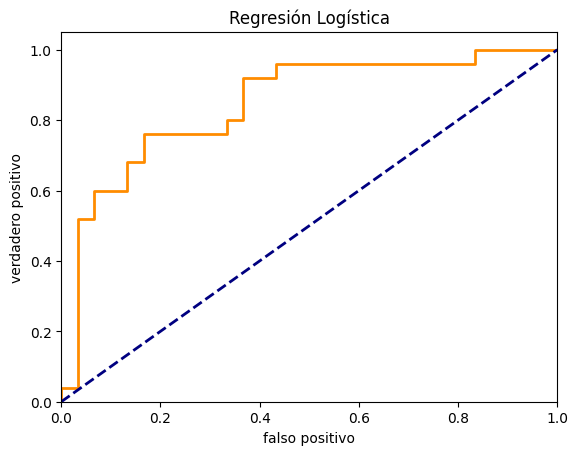

In [10]:
#ROC CURVE
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('falso positivo')
plt.ylabel('verdadero positivo')
plt.title('Regresión Logística')

In [11]:
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.metrics import classification_report


# # Crear un selector secuencial
# sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward', cv=5)

# # Ajustar el selector a los datos de entrenamiento
# sfs.fit(X_train, y_train)

# # Obtener las características seleccionadas
# selected_features = X_train.columns[sfs.get_support()]

# # Crear un nuevo DataFrame con las características seleccionadas
# X_train_selected = X_train[selected_features]
# X_val_selected = X_val[selected_features]



# # Evaluar el modelo en el conjunto de prueba
# y_predd = model.predict(X_test)

# # Calcular métricas
# accuracy = accuracy_score(y_test, y_predd)
# print("Accuracy:", accuracy)
# print(classification_report(y_test, y_predd))
# print("AUC-ROC:", roc_auc_score(y_test, y_predd))

In [12]:
# # Guardar las características seleccionadas
# selected_features = X_train.columns[sfs.get_support()]

# # Entrenar el modelo con las características seleccionadas en el conjunto de entrenamiento completo
# model.fit(X_train[selected_features], y_train)

# # Evaluar el modelo en el conjunto de validación y prueba
# y_val_pred_selected = model.predict(X_val[selected_features])
# y_test_pred_selected = model.predict(X_test[selected_features])

# # Calcular y mostrar métricas para validación y prueba
# print("Validación con características seleccionadas:")
# print(classification_report(y_val, y_val_pred_selected))
# print("AUC-ROC:", roc_auc_score(y_val, model.predict_proba(X_val[selected_features])[:, 1]))

# print("Prueba con características seleccionadas:")
# print(classification_report(y_test, y_test_pred_selected))
# print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test[selected_features])[:, 1]))

In [13]:
# # Modelo con regularización L1
# model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
# model_l1.fit(X_train, y_train)

# # Predicciones y evaluación
# y_pred_l1 = model_l1.predict(X_test)
# print("Resultados con regularización L1:")
# print(classification_report(y_test, y_pred_l1))
# print("AUC-ROC:", roc_auc_score(y_test, model_l1.predict_proba(X_test)[:, 1]))

In [14]:
# # Modelo con regularización L2  --- ESTE ES MEJOR
# model_l2 = LogisticRegression(penalty='l2')
# model_l2.fit(X_train, y_train)

# y_pred_l2 = model_l2.predict(X_test)
# print("Resultados con regularización L2:")
# print(classification_report(y_test, y_pred_l2))
# print("AUC-ROC:", roc_auc_score(y_test, model_l2.predict_proba(X_test)[:, 1]))

In [15]:
# import itertools

# def evaluate_model(X, y):
#     # Divide los datos en entrenamiento y prueba
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Entrena el modelo
#     model = LogisticRegression()
#     model.fit(X_train, y_train)

#     # Evalúa el modelo
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     return accuracy

# # Columnas que siempre se eliminan
# columns_to_remove = ['Final_EDSS', 'Unnamed: 0', 'Initial_EDSS', 'group']

# # Obtener las columnas restantes (características)
# features = [col for col in data2.columns if col not in columns_to_remove]

# # Generar todas las posibles combinaciones de características, iniciando con todas las características y eliminando una por una
# all_combinations = []
# for i in range(len(features)):
#     combinations = itertools.combinations(features, len(features) - i)
#     all_combinations.extend(combinations)

# best_accuracy = 0
# best_combination = None

# for combo in all_combinations:
#     # Crear un nuevo DataFrame con las columnas seleccionadas
#     X_subset = data2[list(combo)]
#     y = data2['group']  # Asegurarse de seleccionar siempre la columna 'group' como target

#     # Evalúa el modelo
#     accuracy = evaluate_model(X_subset, y)

#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_combination = combo

# print("Mejor combinación de columnas:", best_combination)
# print("Mejor precisión:", best_accuracy)